# Center mass

In [24]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px # Requires: pip install plotly


In [25]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/BreachSongs2.xlsx'
df = pd.read_excel(file_path)

In [26]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once",
    "not", "no", "yes", "so", "can", "just", "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "yeahyeahyeahyeah", "daisychained" "thats", "there", "oh", "hell", "wasnt", "when", "shouldnt", "would"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

lyrics = """"(Right)
 I figured out how it's on it (Right this way)
 It goes (Right)
 My death (Right this way)
 Girl, I really don't think you should take that (Stop it)

 A little softer than I used to be (Right)
 Used to mouth off often with artillery
 Now it is cough drops and soft spots in a middle seat (Right this way)
 Chivalry
 A tighter space than I used to know (Right)
 Spread out wide no more, pinch my shoulders close
 Hoping they misplace my reservation (Right this way), okay, okay

 I thought you had it figured out
 I know, I know
 You said you made it to the top
 I lied, I lied
 So, tell us, how did you make out alright?
 Well

 I pull on my shirtsleeve to cover half of my hands
 Bring my arms closer to my body, get as small as I can
 They call it center mass, that part they aim for
 Shrink it down to nothing and forgetting what the pain's for
 I pull on my shirtsleeve (My shirtsleeve), to cover half of my face (Half of my face)
 Bring my arms closer to my body, get as small as they say (Small as they say)
 They call it center mass, that part they aim for (For-for-for-for-for-for)

 Right this way if you're frustrated (Right)
 Your first mate in the fifth grade tried to persuade
 Try it once, he was shown on the bus (Right this way)
 Chain's off my huff, anxious enough as it is (Right)
 Gotta walk, never looking up once at the kids in the park
 What a day, getting dark, what a day (Right this way)
 Okay, okay

 I thought you had it figured out(I thought you had it figured out)
 I know, I know
 You said you made it to the top (You said you made it to the top)
 I lied, I lied
 So, tell us, how did you make out alright?
 Well

 I pull on my shirtsleeve (My shirtsleeve), to cover half of my hands (Half of my hands)
 Bring my arms closer to my body, get as small as I can (Small as I can)
 They call it center mass, that part they aim for
 Shrink it down to nothing and forgetting what the pain's for
 I  pull on my shirtsleeve (My shirtsleeve), to cover half of my face (Half of my face)
 Bring my arms closer to my body, get as small as they say (Small as they say)
 They call it center mass, that part they aim for

 Shrink it down to nothing and forgetting what the pain's for
 That part they aim for

 Found out what I'm worth, I run to you
 I hope you understand this run-on sentence
 My tattoos only hurt when meaning fades
 I think my skin got worse with good intentions
 I don't want to say what happened, I just want to let it go
 Nothing was the same right after, I went to the funeral
 I miss you so, so much, take what you want
 Take what you want from me
 Took you for granted
 They call it center mass, that part they aim for
 That part they aim for
 That part they aim for
 That part they aim for""
 """


In [27]:
# 1. Normalize: lowercase and remove punctuation
# We do this first so "Sun." becomes "sun"
clean_lyrics = re.sub(r'[^\w\s]', '', lyrics.lower())

# 2. Filter: Use your function directly on the string
# No .apply() needed for standard strings
filtered_lyrics = remove_stopwords(clean_lyrics)

# 3. Split: Break the string into a list of words
words = filtered_lyrics.split()

# 4. Tally: Count occurrences
counts = Counter(words)

# 5. Output: View the most frequent meaningful words
print(counts.most_common(10))

[('right', 14), ('part', 9), ('aim', 9), ('way', 7), ('shirtsleeve', 7), ('half', 7), ('small', 7), ('know', 5), ('call', 5), ('center', 5)]


### Center Mass Bar Chart

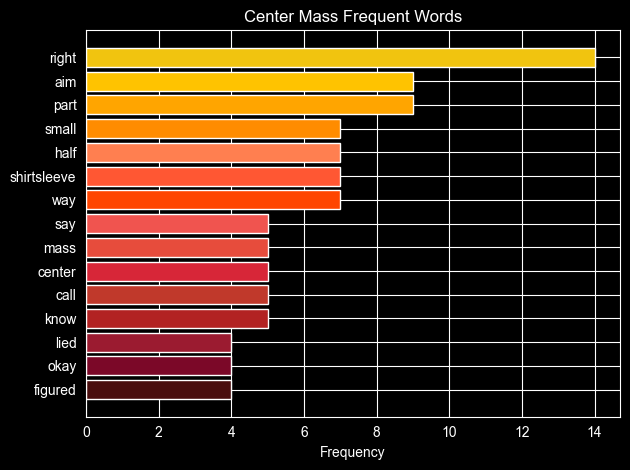

In [28]:
# Convert your Counter object to a sorted DataFrame
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=True)

# Define Red/Orange/Yellow palette
warm_colors = [
    '#4A0E0E', # Dark Garnet
    '#7B0828', # Deep Ruby
    '#9B1B30', # Chili Pepper
    '#B22222', # Firebrick
    '#C0392B', # Pomegranate
    '#D72638', # Crimson
    '#E74C3C', # Alizarin
    '#F0544F', # Soft Coral
    '#FF4500', # Orange Red
    '#FF5733', # Persimmon
    '#FF7F50', # Coral
    '#FF8C00', # Dark Orange
    '#FFA500', # Orange
    '#FFC300', # Sunflower
    '#F1C40F'  # Maize
]


# Create the plot
plt.barh(df_counts['Word'], df_counts['Count'], color=warm_colors)
plt.xlabel('Frequency')
plt.title('Center Mass Frequent Words')
plt.tight_layout()

# Save or display
plt.savefig('center_mass_bar.png')

### Center Mass Lollipop

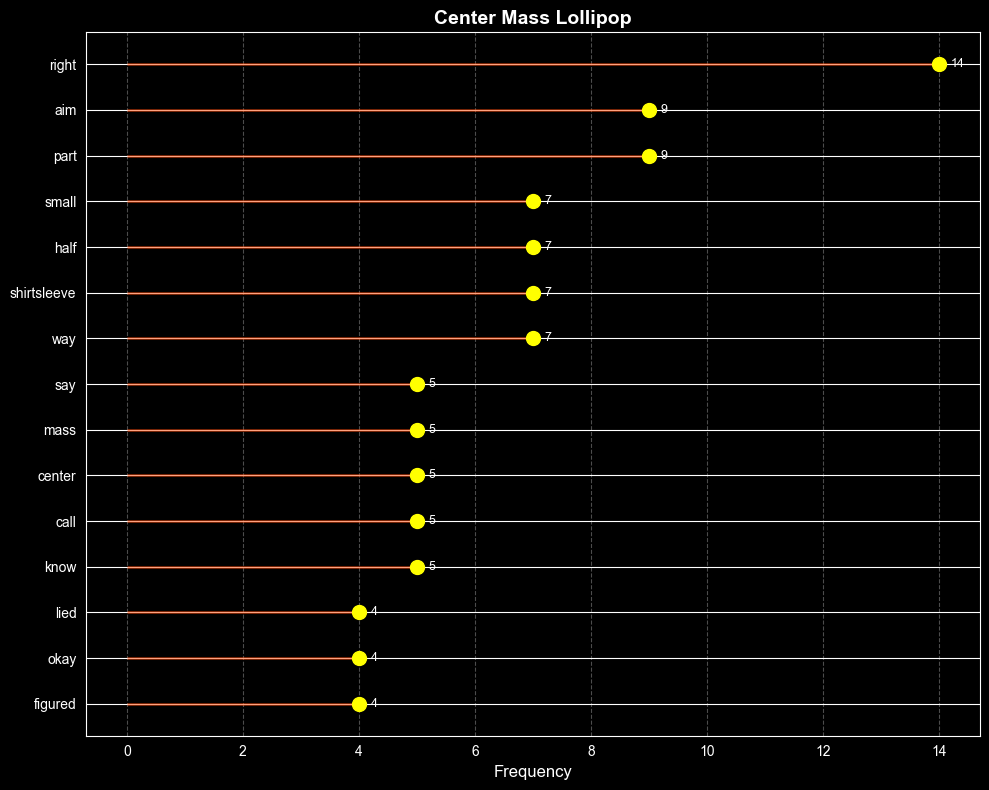

In [29]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
# Sorting ensures the "longest" lollipops are at the top
df_counts = df_counts.sort_values(by='Count', ascending=True)

# 2. Create the plot
plt.figure(figsize=(10, 8))

# Draw the "stems" (horizontal lines)
plt.hlines(y=df_counts['Word'], xmin=0, xmax=df_counts['Count'], color='orangered', alpha=0.5, linewidth=2)

# Draw the "candies" (the dots)
plt.plot(df_counts['Count'], df_counts['Word'], "o", markersize=10, color='yellow')

# 3. Styling
plt.xlabel('Frequency', fontsize=12)
plt.title('Center Mass Lollipop', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Horizontal grids help track the values

# Add labels to the end of the dots (optional)
for i, count in enumerate(df_counts['Count']):
    plt.text(count + 0.2, i, str(count), va='center', fontsize=9)

plt.tight_layout()

# 4. Save or display
plt.savefig('center_mass_lollipop.png')
plt.show()

### Center Mass Bubble Chart

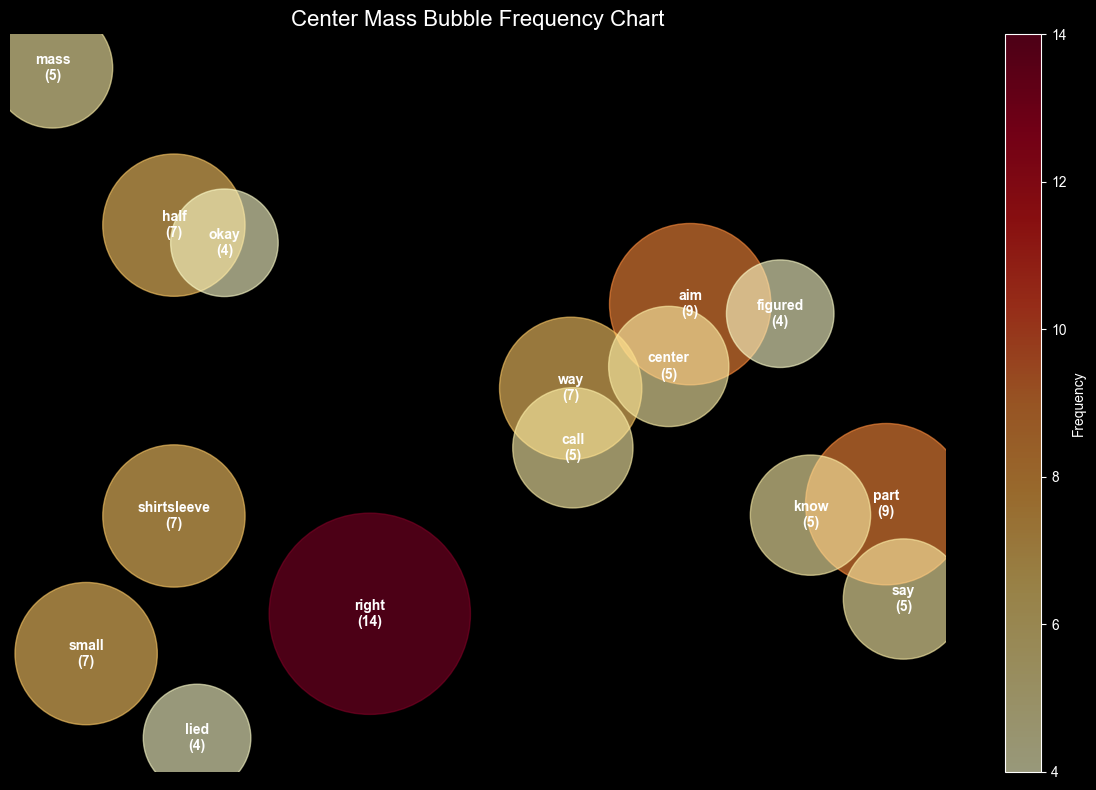

In [30]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Setup positions for the bubbles (random or ordered)
# We use random X and Y coordinates to spread the bubbles out
np.random.seed(42) # Keeps the layout the same every time you run it
df_counts['x'] = np.random.rand(15)
df_counts['y'] = np.random.rand(15)

# 3. Create the plot
plt.figure(figsize=(12, 8))

# Squaring the count allows for more dramatic size differences
df_counts['size'] = df_counts['Count'] ** 2

# s= size of bubbles (multiplied by a factor to make them visible)
# c= color (can be mapped to the count)
scatter = plt.scatter(
    df_counts['x'],
    df_counts['y'],
    s=df_counts['Count'] * 1500,  # Adjust the multiplier (100) based on your data scale
    c=df_counts['Count'],
    cmap='YlOrRd',
    alpha=0.6,
)

# 4. Add the word labels inside or near the bubbles
for i, row in df_counts.iterrows():
    plt.annotate(
        f"{row['Word']}\n({row['Count']})",
        (row['x'], row['y']),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# 5. Styling
plt.title('Center Mass Bubble Frequency Chart', fontsize=16)
plt.axis('off') # Hide axes for a cleaner "cloud" look
plt.colorbar(scatter, label='Frequency') # Optional: adds a color scale legend

plt.tight_layout()
plt.savefig('center_mass_bubble.png')
plt.show()

### Center Mass Tree Map

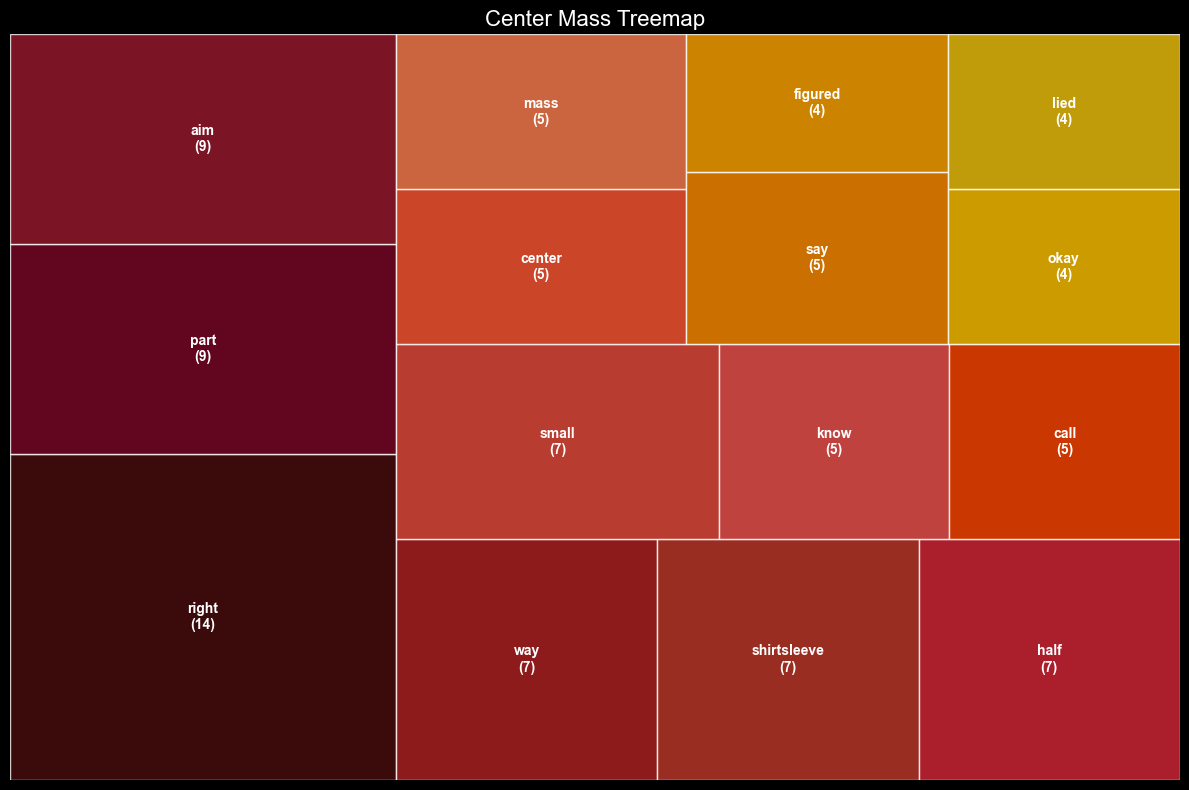

In [31]:
# 1. Prepare your data (from your existing Counter object)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Create the plot
plt.figure(figsize=(12, 8))

# Define colors (using a nice Seaborn palette)
colors = sns.color_palette('viridis', len(df_counts))

# Create labels that include the word and the count
labels = [f"{row['Word']}\n({row['Count']})" for i, row in df_counts.iterrows()]

# 3. Draw the Treemap
squarify.plot(
    sizes=df_counts['Count'],
    label=labels,
    color=warm_colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Styling
plt.title('Center Mass Treemap', fontsize=16)
plt.axis('off') # Treemaps don't need axes

plt.tight_layout()
plt.savefig('center_mass_treemap.png')
plt.show()

### Center Mass Word Cloud

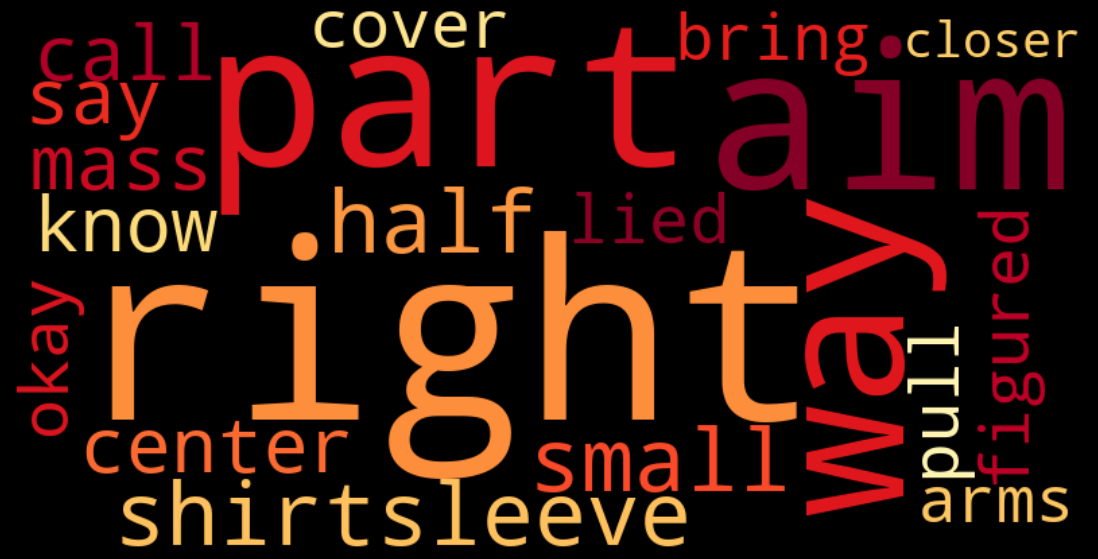

In [32]:
# Join all words into one string weighted by their count
word_freq = dict(counts.most_common(20))

wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='YlOrRd'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Center Mass Radial Bar Chart

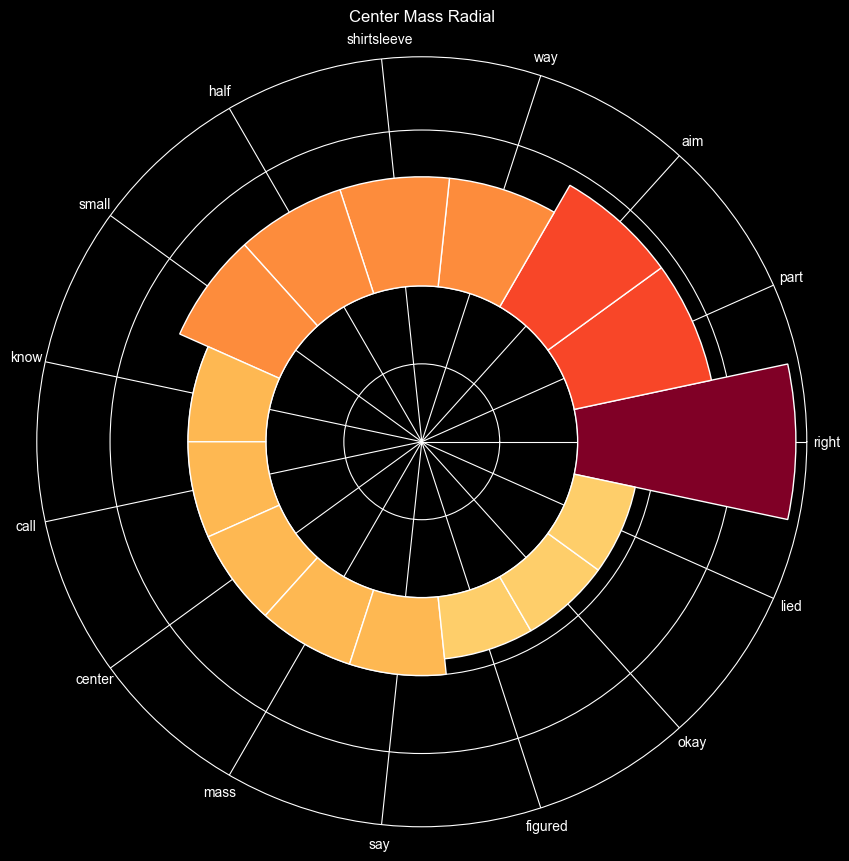

In [33]:
# Prepare data
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
n = len(df_counts)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
widths = [2 * np.pi / n] * n

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Create the bars
bars = ax.bar(angles, df_counts['Count'], width=widths, bottom=10,
              color=plt.cm.YlOrRd(df_counts['Count'] / df_counts['Count'].max()),
              edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(df_counts['Word'], fontsize=10)
ax.set_yticklabels([]) # Hide radial grid numbers
plt.title("Center Mass Radial", va='bottom')
plt.show()

### Center Mass Funnel Chart

In [34]:
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

fig = px.funnel(df_counts, x='Count', y='Word',
                title='Center Mass Funnel',
                color = 'Word',
                color_discrete_sequence=warm_colors)
fig.show()